In [6]:

import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib
import time

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import defaultdict


# Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from pygam import GAM, LinearGAM
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import QuantileRegressor


In [2]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1I8fEs3QzujcTF4IKzuyJVg7pwZITcuKI/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('steel industry.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('steel industry.csv')
data.head(20)


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [3]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

(None,
           Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
 count  35040.000000                          35040.000000   
 mean      27.386892                             13.035384   
 std       33.444380                             16.306000   
 min        0.000000                              0.000000   
 25%        3.200000                              2.300000   
 50%        4.570000                              5.000000   
 75%       51.237500                             22.640000   
 max      157.180000                             96.910000   
 
        Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
 count                          35040.000000  35040.000000   
 mean                               3.870949      0.011524   
 std                                7.424463      0.016151   
 min                                0.000000      0.000000   
 25%                                0.000000      0.000000   
 50%                                0.000000      0.000000   

In [4]:


for col in data.columns:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print(f"Value Counts:\n{value_counts}\n")

Column: date
Unique Values: ['01/01/2018 00:15' '01/01/2018 00:30' '01/01/2018 00:45' ...
 '31/12/2018 23:30' '31/12/2018 23:45' '31/12/2018 00:00']
Value Counts:
date
01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: count, Length: 35040, dtype: int64

Column: Usage_kWh
Unique Values: [ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Value Counts:
Usage_kWh
3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
130.21      1
19.33       1
23.83       1
12.78       1
45.00       1
Name: count, Length: 3343, dtype: int64

Column: Lagging_Current_Reactive.Power_kVarh
Unique Values: [ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Value Counts:
Lagging_Current_Reactive.Power_kVarh
0.00     7194
4.46      208
4.82      203
4.68      202
4.75      202
         ... 
79.78       1
69.

In [7]:
data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y %H:%M")
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is categorical
        data[col] = le.fit_transform(data[col])

# Now all categorical columns in the 'data' DataFrame are converted to numerical representations.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  int64         
 9   Day_of_week                           35040 non-null  int64         
 10

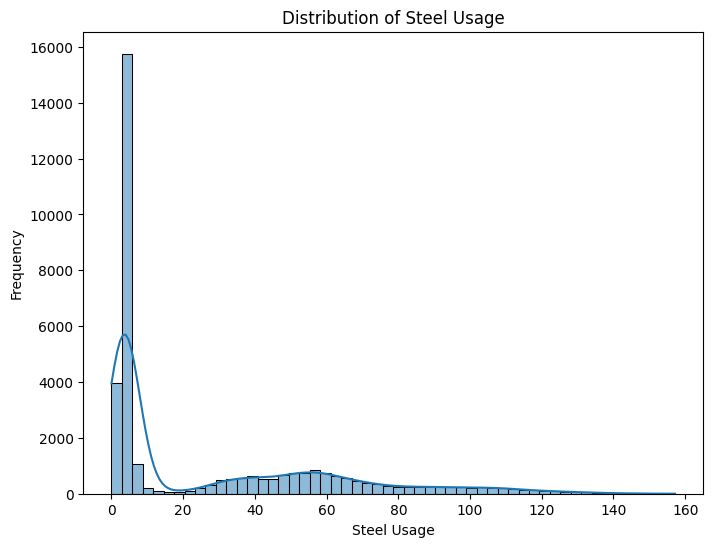

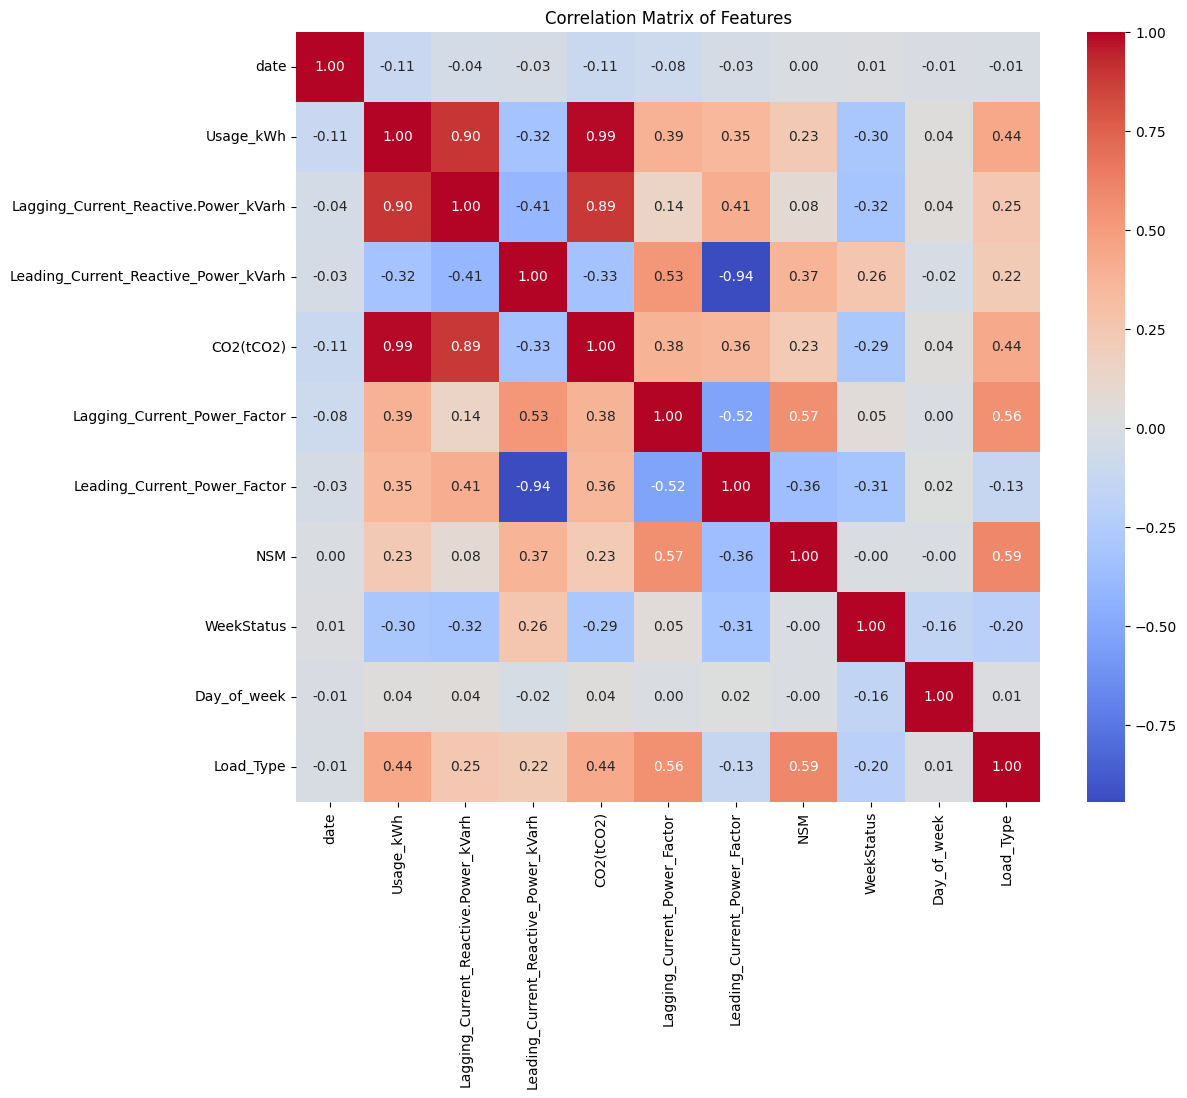

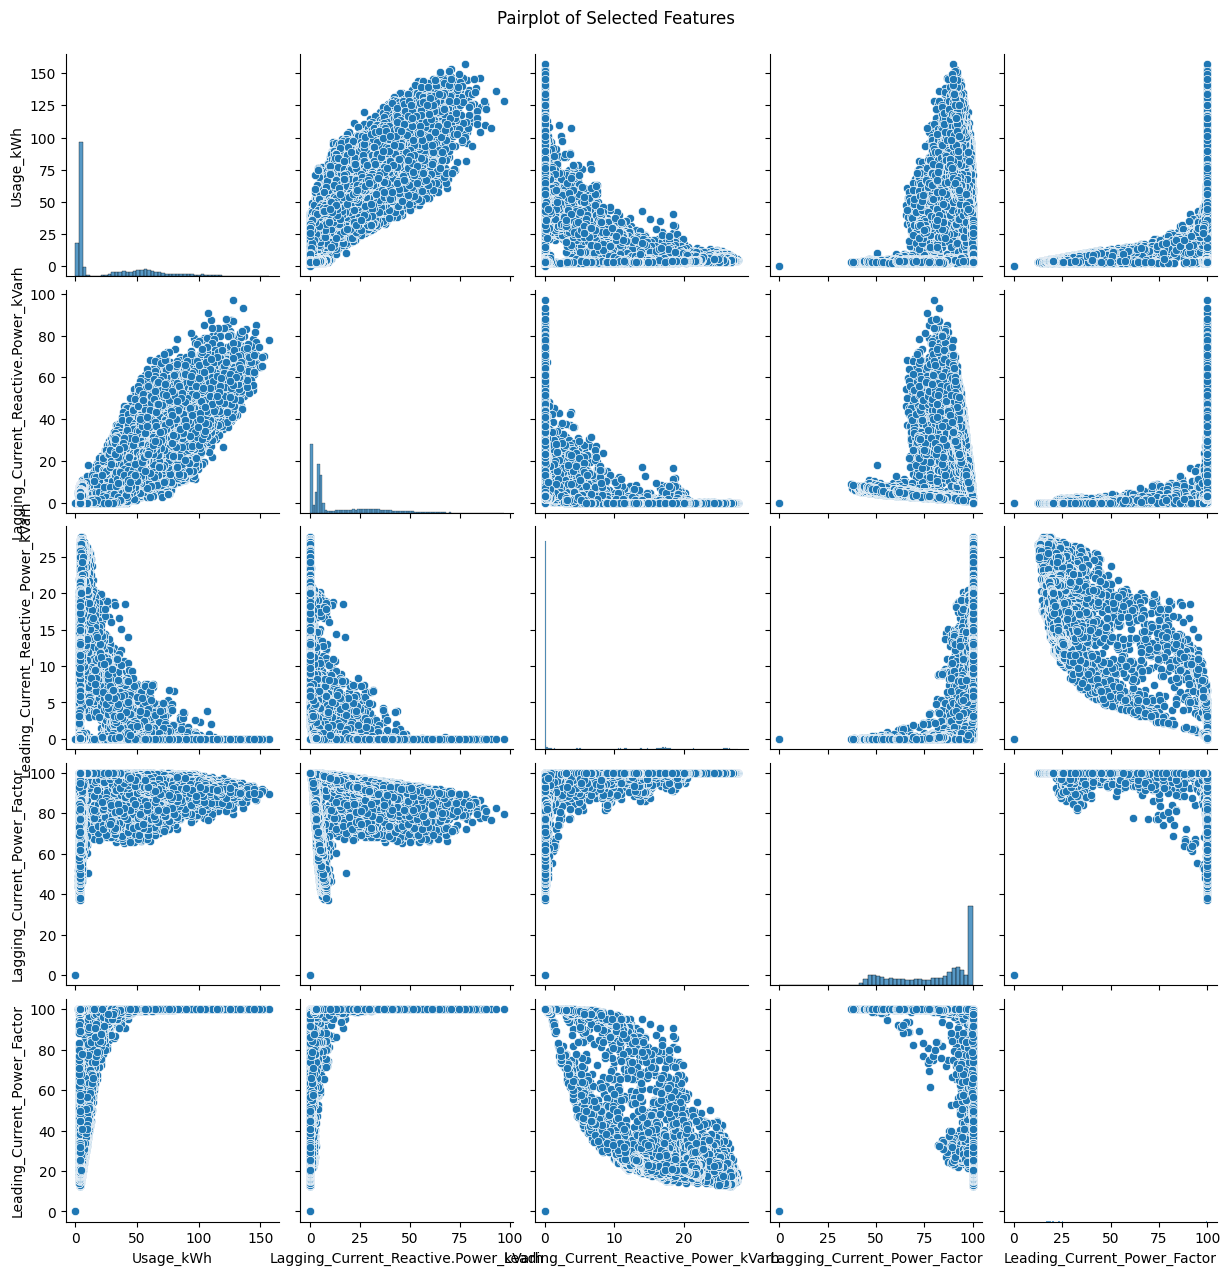

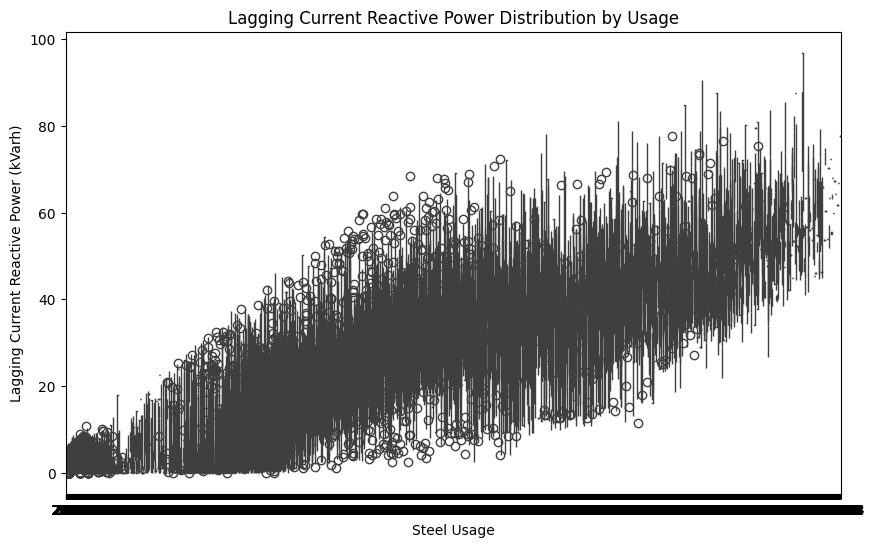

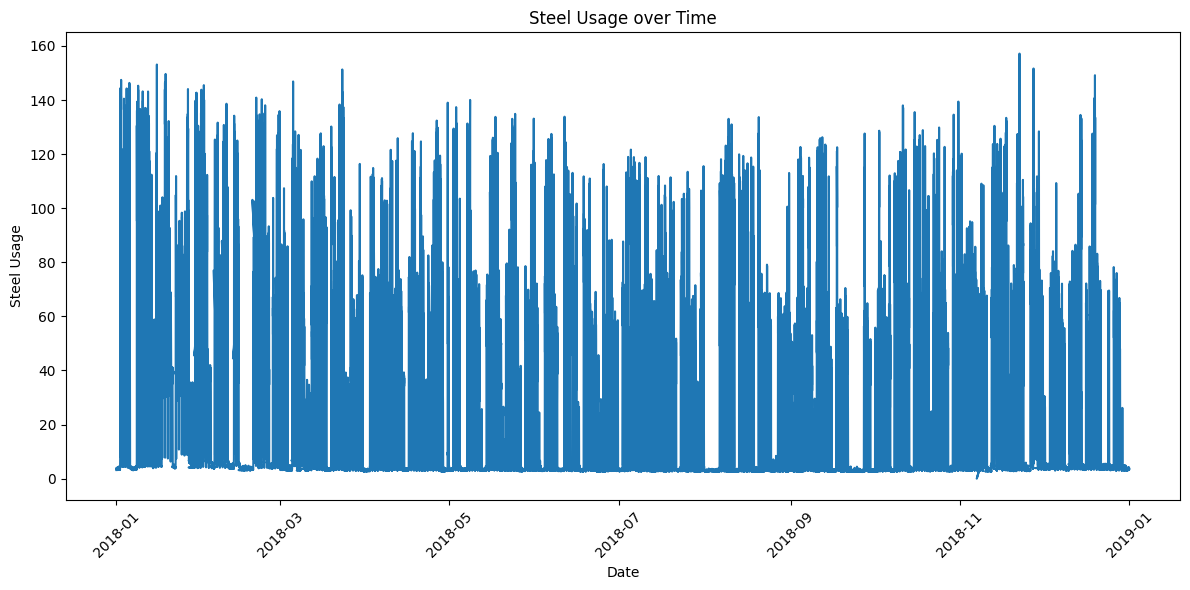

In [8]:
# Visualizations for insights
# 1. Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Usage_kWh'], kde=True)
plt.title('Distribution of Steel Usage')
plt.xlabel('Steel Usage')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Pairplot for selected features (adjust as needed)
selected_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',	'Leading_Current_Reactive_Power_kVarh',	'Lagging_Current_Power_Factor','Leading_Current_Power_Factor'	]
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# 4. Box plots to show the distribution of features based on a category
# Example using 'Usage' as the category and 'Lagging_Current_Reactive.Power_kVarh' as a feature

plt.figure(figsize=(10, 6))
sns.boxplot(x='Usage_kWh', y='Lagging_Current_Reactive.Power_kVarh', data=data)
plt.title('Lagging Current Reactive Power Distribution by Usage')
plt.xlabel('Steel Usage')
plt.ylabel('Lagging Current Reactive Power (kVarh)')
plt.show()

# 5. Time series plot of usage over time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['Usage_kWh'])
plt.xlabel('Date')
plt.ylabel('Steel Usage')
plt.title('Steel Usage over Time')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



In [9]:
X = data.drop(columns=['Usage_kWh','date'], axis=1)
y = data['Usage_kWh']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
regression_algorithms = {
    "Multiple_Linear_Regression": {
        "model": LinearRegression(fit_intercept=True, n_jobs=None)
    },

    "Polynomial_Regression": {
        "model":  LinearRegression(fit_intercept=True, n_jobs=None),
        "poly": PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
    },

    "Ridge_Regression": {
        "model": Ridge(alpha=1.0, fit_intercept=True, max_iter=None,
                      tol=1e-3, solver='auto')
    },

    "Lasso_Regression": {
        "model": Lasso(alpha=0.01, fit_intercept=True, max_iter=1000,
                      tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Elastic_Net_Regression": {
        "model": ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=True,
                           max_iter=1000, tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Decision_Tree_Regression": {
        "model": DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=1,
                                     max_features=None, random_state=42)
    },

    "Random_Forest_Regression": {
        "model": RandomForestRegressor(n_estimators=200, criterion="squared_error", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=2, bootstrap=True,
                                     n_jobs=-1, random_state=42)
    },

    "ADA_Boost_Regression": {
        "model": AdaBoostRegressor(n_estimators=50, learning_rate=0.1,
                                 loss="linear", random_state=42)
    },

    "Gradient_Boosting_Regression": {
        "model": GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100,
                                         subsample=0.8, criterion="friedman_mse",
                                         min_samples_split=2, min_samples_leaf=1,
                                         max_depth=5, random_state=42)
    },

    "XGBoost_Regression": {
        "model": xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100,
                                 objective="reg:squarederror", booster="gbtree", gamma=0,
                                 min_child_weight=1, subsample=1, colsample_bytree=1,
                                 reg_alpha=0, reg_lambda=1)
    },

    "K_Nearest_Neighbors_Regression": {
        "model": KNeighborsRegressor(n_neighbors=5, weights="uniform", algorithm="auto",
                                   leaf_size=30, p=2, metric="minkowski", n_jobs=-1)
    },

    "Support_Vector_Regression": {
        "model": SVR(kernel="rbf", degree=3, C=1.0, epsilon=0.1, gamma="scale",
                    tol=1e-3, max_iter=-1)
    },

    "Bayesian_Ridge_Regression": {
        "model": BayesianRidge(max_iter=300, tol=1e-3, alpha_1=1e-6, alpha_2=1e-6,
                              lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True)
    },

    "Neural_Network_Regression": {
        "model": MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam",
                            alpha=0.0001, batch_size="auto", learning_rate="constant",
                            learning_rate_init=0.001, max_iter=500, random_state=42)
    },

    "Generalized_Additive_Models": {
        "model": LinearGAM(n_splines=15, lam=0.5)
    },

    "Quantile_Regression": {
        "model": QuantileRegressor(quantile=0.5, alpha=0.0, solver="highs-ds",
                                 fit_intercept=True)
    }
}

In [14]:

models_dir = "trained_models"
os.makedirs(models_dir, exist_ok=True)

results = defaultdict(dict)

for name, config in regression_algorithms.items():
    start_time = time.time()
    model = config["model"]

    if name == "Polynomial_Regression":
        poly = config["poly"]
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    results[name]["mse"] = mse
    results[name]["r2"] = r2
    results[name]["mae"] = mae
    results[name]["time"] = time.time() - start_time

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)

    print(f"Trained and saved {name} model. MSE: {mse}, R2: {r2}, MAE: {mae}, Time: {results[name]['time']:.2f} seconds")

# Save the results to a CSV file
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv("regression_results.csv")
print("Results saved to regression_results.csv")

Trained and saved Multiple_Linear_Regression model. MSE: 17.869102662354656, R2: 0.9842801517414372, MAE: 2.529751860605775, Time: 0.02 seconds
Trained and saved Polynomial_Regression model. MSE: 4.125468812748818, R2: 0.996370733049261, MAE: 1.2073400715831724, Time: 0.15 seconds
Trained and saved Ridge_Regression model. MSE: 17.871787523088244, R2: 0.9842777898095526, MAE: 2.5303152794629686, Time: 0.01 seconds
Trained and saved Lasso_Regression model. MSE: 17.85164787115235, R2: 0.9842955071106614, MAE: 2.5280581094933328, Time: 0.05 seconds
Trained and saved Elastic_Net_Regression model. MSE: 18.30599896183435, R2: 0.983895804319951, MAE: 2.6093737296254482, Time: 0.07 seconds
Trained and saved Decision_Tree_Regression model. MSE: 2.1967836615296803, R2: 0.9980674404043305, MAE: 0.532224600456621, Time: 0.27 seconds
Trained and saved Random_Forest_Regression model. MSE: 1.2260757086730671, R2: 0.9989213938462363, MAE: 0.3407103473913442, Time: 20.49 seconds
Trained and saved ADA_Bo

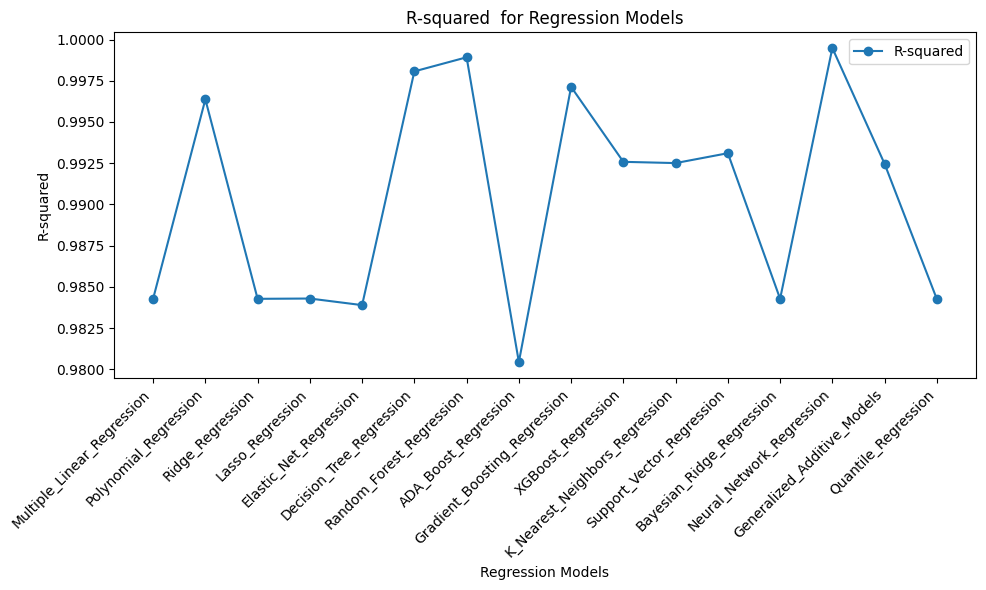

In [15]:

plt.figure(figsize=(10, 6))

# Plot R-squared values
plt.plot(results_df.index, results_df['r2'], marker='o', linestyle='-', label='R-squared')


plt.xlabel("Regression Models")
plt.ylabel("R-squared")
plt.title("R-squared  for Regression Models")
plt.xticks(rotation=45, ha="right")
plt.legend()


plt.tight_layout()
plt.show()

In [18]:


# Load the saved scaler
scaler = joblib.load('scaler.pkl')

# Load all saved models
models_dir = "trained_models"
loaded_models = {}
for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove the ".joblib" extension
        model_path = os.path.join(models_dir, filename)
        loaded_models[model_name] = joblib.load(model_path)

# New record (example) - replace with your actual data
new_record =np.array([4.46,	0.0	,0.0	,66.77,	100.0	,1800	,1	,2,	1])

# Reshape the new record to a 2D array
new_record_reshaped = new_record.reshape(1, -1)


# Scale the new record using the loaded scaler
new_record_scaled = scaler.transform(new_record_reshaped)

# Make predictions using each loaded model
predictions = {}
for model_name, model in loaded_models.items():
    if model_name == "Polynomial_Regression":
        poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
        new_record_poly = poly.fit_transform(new_record_reshaped) # Apply poly to the unscaled data
        prediction = model.predict(new_record_poly)
    else:
        prediction = model.predict(new_record_scaled)
    predictions[model_name] = prediction

# Print the predictions
for model_name, prediction in predictions.items():
    print(f"Prediction from {model_name}: {prediction}")

Prediction from Generalized_Additive_Models: [4.05702906]
Prediction from Gradient_Boosting_Regression: [9.43302001]
Prediction from Ridge_Regression: [4.82729058]
Prediction from Elastic_Net_Regression: [5.07680406]
Prediction from Decision_Tree_Regression: [56.84]
Prediction from Support_Vector_Regression: [5.34563468]
Prediction from Neural_Network_Regression: [4.16927014]
Prediction from Bayesian_Ridge_Regression: [4.82577252]
Prediction from ADA_Boost_Regression: [4.21055907]
Prediction from Multiple_Linear_Regression: [4.82518931]
Prediction from K_Nearest_Neighbors_Regression: [3.706]
Prediction from Polynomial_Regression: [178528.08283174]
Prediction from Lasso_Regression: [4.76794951]
Prediction from Random_Forest_Regression: [38.47159854]
Prediction from XGBoost_Regression: [4.6832013]
Prediction from Quantile_Regression: [4.06405487]
